In [1]:
# 당뇨병 환자의 데이터
from sklearn.datasets import load_diabetes
diabetes = load_diabetes() 

In [4]:
# 데이터의 크기 확인하기
print(diabetes.data.shape) # feature, 특성
print(diabetes.target.shape)
# () 튜플로 구성되어 있다

(442, 10)
(442,)


> data는 442개의 행과 10개의 열로 구성된 2차원 배열 입니다.     
> targetdms 442개의 요소(element)를 가진 1차원 배열 입니다.     
> 여기서 442개를 Sample갯수라고 하며, 10개를 특성(Feature)갯수 라고 합니다.


In [5]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [7]:
# data 일부 보기(0~2)
diabetes.data[0:3] 
# 값이 표준화 되어있다

array([[ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
        -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, -0.02632783, -0.00844872,
        -0.01916334,  0.07441156, -0.03949338, -0.06832974, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, -0.00567061, -0.04559945,
        -0.03419447, -0.03235593, -0.00259226,  0.00286377, -0.02593034]])

In [8]:
# target의 일부 보기
diabetes.target[:3]

array([151.,  75., 141.])

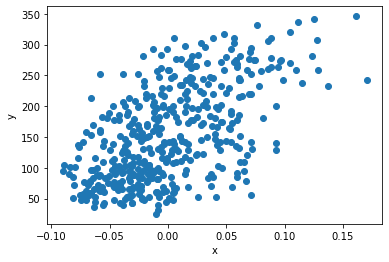

In [9]:
# 당뇨병 환자 데이터 시각화 하기 (data의 3번째 Feature)
# 선형회귀라서 피쳐를 한개만 고른 것
import matplotlib.pyplot as plt

plt.scatter(diabetes.data[:,2] , diabetes.target)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [10]:
# 상관계수 알아보기
import numpy as np

np.corrcoef(diabetes.data[:,2] , diabetes.target)

array([[1.        , 0.58645013],
       [0.58645013, 1.        ]])

---
# 경사 하강법
: 경사하강법은 모델이 데이터를 잘 표현 할 수 있도록 기울기("변화율"(W))를 사용하여 모델을 조금씩 조정하는 최적화 알고리즘

# 예측값과 변화율 
### 예측값 (y^)
예측값은 하나의 모델에서 수식의 결과로 나온 값을 의미 합니다. // 예측값이 정답값으로 수렴한다 

### 훈련데이터에서 잘 맞는 w와 b를 찾는 방법
1. 무작위로 w와 b를 정합니다. 
2. x에서 샘플 하나를 선택하여 y^을 계산 합니다.
3. y^과 선택한 샘플의 진짜 y를 비교합니다. (예측한 값과 정답 비교하기 : 오차 구하기)
4. y^이 y와 가까워지도록 w, b를 조정합니다. (모델 조정하기 : 학습하기)
5. 모든 샘플을 처리할 때까지 2) ~ 4)항목을 반복 합니다.

// y^ > y / y^ < y / y^ ~~ y

In [11]:
# 훈련데이터의 Feature과 Target 정하기
x = diabetes.data[:,2]
y = diabetes.target

# 5개만 출력해보기
print(x[:5])
print(y[:5])

[ 0.06169621 -0.05147406  0.04445121 -0.01159501 -0.03638469]
[151.  75. 141. 206. 135.]


In [12]:
# w 와 b를 초기화 하기 : 무작위로 그냥 weight와 Bias를 1로 선택
w = 1.0
b = 1.0

In [13]:
# 훈련데이터의 첫번째 Sample데이터로 y^ 계산하기
y_hat = x[0]* w + b
y_hat

1.0616962065186886

In [15]:
# Target과 예측 데이터 비교하기
print(y_hat)
print(y[0])

1.0616962065186886
151.0


> 당연한 결과지만 Target과 예측값이 너무 많은 차이가 발생했다.

### w값을 조절하기
: w와 b를 조금씩 변경해서 y_hat이 증가하는지 감소하는지 살펴보기

In [16]:
# 기준 w에 0.1만 증가해 보기
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
y_hat_inc
# 151에 조금 더 가까워졌다. w를 + 시켜야 되는 구나!

1.0678658271705574

> y_hat보다 y_hat_inc가 조금 더 Target에 근접해졌다.

In [18]:
# w값 조정한 후 예측값 정도 확인하기
# w가 0.1 증가 했을 때 y_hat이 얼마나 증가했는지 계산해보기 (* 변화율 확인하기 *)
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate
# 변화율이 자기 자신이다 

0.061696206518688734

> w_rate(변화율) 이 x[0] 값과 동일하다. @@@@

In [19]:
# 0.1로 하여서 그런가? 0.2로 바꾸어서 계산해 보자
w_inc = w + 0.2
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.06169620651868769

In [21]:
# 0.2로 해도 같은 값이 나온다. 훈련데이터의 2번째 값(음수)로 테스트 해보자!
w_inc = w + 0.1
y_hat = x[1] * w + b
y_hat_inc = w_inc * x[1] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate
# 변화율과 정답값이 또 같다 

-0.05147406123880644

In [22]:
# 변화율에 대한 증명이 끝났으니 다시 훈련데이터의 1번째 값으로 변화율 구해보자
w = b = 1
y_hat = x[0] * w + b
w_inc = w + 0.1
y_hat_inc = w_inc * x[0] + b
w_rate = (y_hat_inc - y_hat) / (w_inc - w)
w_rate

0.061696206518688734

In [23]:
# 변화율로 가중치를 업데이트 하기 <- 학습하기
w_new = w + w_rate
w_new

1.0616962065186888

In [24]:
# 변화율로 절편 업데이트 하기 <- 학습하기
b_inc = b + 0.1
y_hat_inc = w * x[0] + b_inc
print(y_hat_inc)

b_rate = (y_hat_inc - y_hat) / (b_inc - b)
print(b_rate)

1.1616962065186887
1.0


In [25]:
b_new = b + 1
b_new

2

In [26]:
# 오차 역전파로 가중치와 절편을 업데이트 합니다.(머신러닝) -> 손실함수(비용함수)를 구성합니다. (딥러닝)
# 오차 역전파(backpropagation)는 y^ 과 y의 차이를 이용하여 w와 b를 업데이트 합니다. 
# 오차와 변화율을 곱하여 가중치 업데이트 하기

err = y[0] - y_hat
w_new = w + w_rate * err
b_new = b + b_rate * err
print(w_new , b_new) # 손실함수에서 점프한것

10.250624555904514 150.9383037934813


In [28]:
# 2번째 샘플 x[1]을 사용하여 오차를 구하고 새로운 w 와 b를 구하기
y_hat = w_new * x[1] + b_new
err = y[1] - y_hat
w_rate = x[1]
w_new = w_new + w_rate * err
b_new = b_new + 1 * err
print(w_new, b_new)

-550.0723689440274 77.04814147996149


In [29]:
# 반복문을 통한 전체 샘플을 반복하기
w = b = 1
for x_i , y_i in zip(x, y):
    y_hat = x_i * w + b
    err = y_i - y_hat
    w_rate = x_i
    w = w + w_rate * err
    b = b + 1 * err

print(w , b) # 이게 선형 회귀 식이다.

587.8654539985689 99.40935564531424


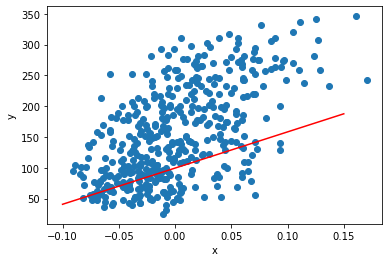

In [33]:
# 그래프로 확인 해보자
plt.scatter(x,y)
# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위
pt1 = (-0.1 , -0.1*w + b)
pt2 = (0.15 , 0.15*w + b)
plt.plot([pt1[0] , pt2[0]] , [pt1[1] , pt2[1]] , 'r') # 'r' : red
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 나름 근접하게는 나왔다.

In [34]:
# Epoch로 반복하기 : w 와 b를 반복적으로 계산해 보기

w = b = 1
for _ in range(100):
    for x_i , y_i in zip(x, y):
        y_hat = x_i * w + b
        err = y_i - y_hat
        w_rate = x_i
        w = w + w_rate * err
        b = b + 1 * err

print(w , b) # 이게 선형 회귀 식이다.

913.5973364345905 123.39414383177204


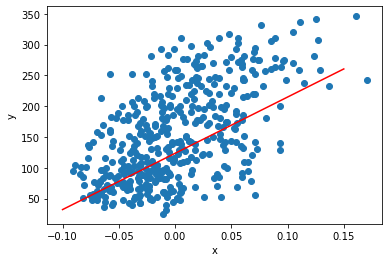

In [35]:
# 그래프로 확인 해보자
plt.scatter(x,y)
# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위
pt1 = (-0.1 , -0.1*w + b)
pt2 = (0.15 , 0.15*w + b)
plt.plot([pt1[0] , pt2[0]] , [pt1[1] , pt2[1]] , 'r') # 'r' : red
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# 더 그럴싸하게 나왔다

> y_^ = 913.6 X + 123.4

In [36]:
# 모델로 예측해 보기
x_new = 0.18
y_pred = x_new * w + b
y_pred

287.8416643899983

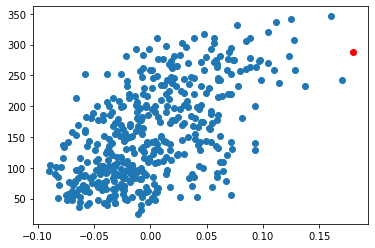

In [42]:
# 그래프로 확인 해보자
plt.scatter(x,y)
plt.scatter(x_new , y_pred ,c='r' ) # 'r' : red
plt.show()
# 그럴싸하게 예측하는것 같다

---
# 모델 만들기 정리
1. w와 b를 임의의 값 (1,1)로 초기화 하고 훈련데이터의 샘플을 하나씩 대입하여 y와 y^의 오차를 구한다.
2. 1.에서 구한 오차를 w와 b의 변화율에 곱하고 이 값을 이용하여 w와 b를 업데이트 한다. (= 학습한다.)
3. 만약 y^이 y보다 커지는 오차는 음수가 되어 자동으로 w와 b가 줄어드는 방향으로 업데이트가 된다. 
4. 반대로 y^이 y보다 작으면 오차는 양수가 되어 w와 b는 더 커지도록 업데이트가 된다.  

# 선형 회귀를 위한 Class 만들기

In [43]:
class LRModel:
    # 초기화 작업 
    def __init__(self):
        self.w = 1.0 # 가중치를 초기화
        self.b = 1.0 # 절편을 초기화

    # 정방향 계산
    def forpass(self, x): # x
        y_hat = x * self.w + self.b # 직선 방정식을 계산
        return y_hat
    
    # 역방향 계산
    def backprop(self,x, err ): # 오차율
        w_grad = x * err # 가중치에 대한 그레디언트를 계산
        b_grad = 1 * err # 절편에 대한 그레디언트를 계산
        return w_grad, b_grad

    # 훈련
    def fit(self, x, y, epoch):
        for _ in range(epoch):
            for x_i , y_i in zip(x, y):
                y_hat = self.forpass(x_i)
                err = (y_i - y_hat) # 정답값 - 예측값
                w_grad , b_grad = self.backprop(x_i , err)
                self.w += w_grad
                self.b += b_grad
        return self.w , self.b

In [71]:
lrmodel = LRModel() # 이떄 생성자 작동 , w,b에 1이들어감
w, b = lrmodel.fit( x , y , 10)
print(w , b)

913.5656499923714 123.39181064719298


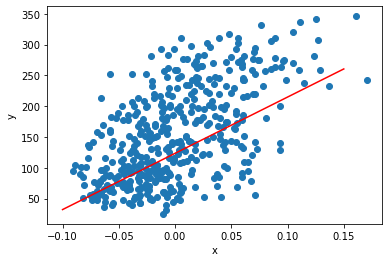

In [72]:
# 그래프로 확인 해보자
plt.scatter(x,y)
# 산포도에서 x축 범위를 보면 -0.1 ~ 0.15의 범위
pt1 = (-0.1 , -0.1*w + b)
pt2 = (0.15 , 0.15*w + b)
plt.plot([pt1[0] , pt2[0]] , [pt1[1] , pt2[1]] , 'r') # 'r' : red
plt.xlabel('x')
plt.ylabel('y')
plt.show()

---
# 용어 정리
### 선형 회귀
선형방정식(y=wx+b) 을 사용하여 연속적인 값을 예측하는 알고리즘으로 데이터를 가장 잘 표현하는 방정식의 계수를 구할 수 있습니다.      
머신러닝 알고리즘이지만 딥러닝 에서 사용하는 인공신경망 알고리즘의 기초가 됩니다.       
선형회귀(y,x) -> 로지스틱 회귀(regression)(y , x1,x2,x3,x4) -> 인공신경망(은닉층, 활성화함수 붙어있음) -> 딥러닝(은닉층이 여러개)   
### 경사 하강법
최적화 알고리즘 중의 하나로 핵심 훈련 알고리즘 입니다.      
이 방법은 최적의 모델을 만드는 가중치를 한번에 찾지 않습니다.       
먼저 임의로 정한 가중치에서 출력을 만든 후 타깃과 비교하여 오차를 줄이는 방향으로 가중치를 조정합니다.      
이런 과정의 모든 훈련샘플에 대해서 반복하면서 최적의 가중치를 찾습니다.     

### 손실함수
모델이 얼마만큼의 오류가 있는지 측정하는 기준입니다.        
손실함수의 값을 최소로 만드는 것이 이 모델 훈련의 목적입니다.       
다른 말로는 비용함수 또는 목적함수(잘안함)라고도 부릅니다.     

---